In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv('iris-data.csv')
print(data.head())
print(data.columns)

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


In [10]:
encode = LabelEncoder()
data.variety = encode.fit_transform(data.variety)
print(data.head())

   sepal.length  sepal.width  petal.length  petal.width  variety
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [11]:
train_x, test_x, train_y, test_y = train_test_split(data, data.variety, test_size=0.25, random_state=0)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(112, 5) (112,)
(38, 5) (38,)


In [12]:
model = LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
predict = model.predict(test_x)
print(encode.inverse_transform(predict))

['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Virginica'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica'
 'Versicolor' 'Setosa' 'Virginica' 'Virginica' 'Versicolor' 'Setosa'
 'Versicolor']


In [14]:
print(accuracy_score(test_y, predict))

1.0


In [0]:
setosa = data.loc[data.variety==0]
versicolor = data.loc[data.variety==1]
virginica = data.loc[data.variety==2]

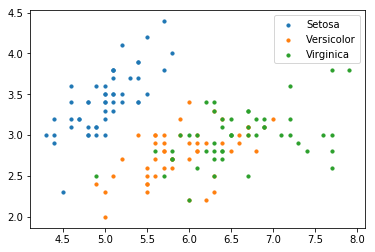

In [17]:
plt.scatter(setosa.iloc[:, 0], setosa.iloc[:, 1], s=10, label='Setosa')
plt.scatter(versicolor.iloc[:, 0], versicolor.iloc[:, 1], s=10, label='Versicolor')
plt.scatter(virginica.iloc[:, 0], virginica.iloc[:, 1], s=10, label='Virginica')
plt.legend()
plt.show()